# TRAVAIL PRATIQUE 2 :Régression logistique


Ce Travail Pratique à la suite du premier, consiste à implémenter et tester la régression pour la classification autrement appelée _"Régression Logistique"_ et la comparer avec les fonction implémentées dans la bibliothèque Sklearn.

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import datasets
import pandas as pd

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## 1. Problème jouet

 a) Générez cette base de données synthétiques telle que :


◦ chaque classe contient 300 points

◦ λ1 ∼ N ((1, 1), 0.7) et λ2 ∼ N ((−1, −1), 0.7)

In [3]:
X, y = make_blobs(n_samples=300, centers=[(1,1),(-1,-1)],cluster_std=0.7)


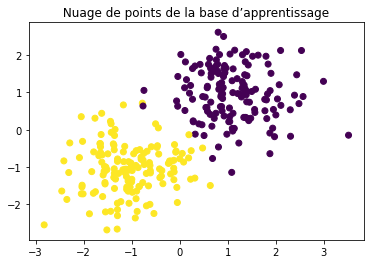

In [4]:
plt.title(" Nuage de points de la base d’apprentissage ")
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

 b) Importez la modèle de régression logistique de scikit-learn et entrainez le sur la base synthétique que vous venez de créer

In [5]:
#Entrainement du jeu de données

clf = LogisticRegression(random_state=0).fit(X, y)

 Affichez la fonction de décision du modèle, comme montré en figure 2. Pour cela, il faut :
 
 
1. Générer une grille de points 2D à l’aide de la fonction mesh que nous donnons ci-dessous.
2. Rassembler les prédictions du modèle pour chacun des points de cette grille.
3. Afficher le nuage de points de la base d’apprentissage
4. Afficher les frontières de décisions en utilisant la fonction contourf de Matplotlib

In [6]:
def mesh(X, h = 0.02):
    x_min , x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min , y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min , x_max , h), np.arange(y_min , y_max , h))
    return np.c_[xx.ravel(), yy.ravel()], xx, yy
#
data_Test=mesh(X, h = 0.02) # Génération d'une data de test selon la taille du data d'App.
X_test=data_Test[0]

In [7]:
prediction=clf.predict(X_test)
print(" Prédictions du modèle pour chacun de points de la grille \n ",prediction)

 Prédictions du modèle pour chacun de points de la grille 
  [1 1 1 ... 0 0 0]


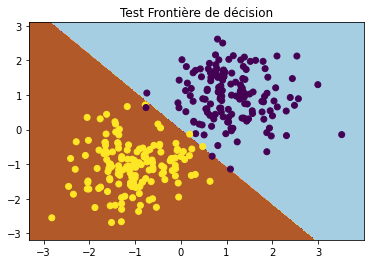

In [8]:
yhat =prediction
zz = yhat.reshape(data_Test[1].shape)
plt.contourf(data_Test[1], data_Test[2], zz, cmap='Paired')
plt.scatter(X[:,0],X[:,1],c=y)
plt.title("Test Frontière de décision")
plt.show()

## 2. Régression logistique sur le problème jouet

a) Implémentez le calcul du coût en complétant la fonction ci-dessous :

In [9]:
def logreg_cost(X, y, w):
    z = X@w
    cost=np.sum(y@z.T) + np.sum(np.log(1+np.exp(-z)))
    return cost

b) Implémentez l’estimation des paramètres du modèle de regression logistique en utilisant la
méthode de descente de gradient :

In [10]:
def logreg_grad_desc(X,y):
    d=X.shape[1]
    #rs = np.random.RandomState(seed=10)
    #w = rs.randn(d)
    w = np.random.randn(d)
    nb_iter = 100 # to tune
    pas = 0.01 # to tune
    beta = 0.9 # for backtracking if needed - to tune
    for i in range(nb_iter):
        z = X @ w
    # insérer votre code ici
        grad = X.T @ (y - (np.exp(-z)/(1+np.exp(-z))))
        w = w - pas * grad
    return w 
#
#w=logreg_grad_desc(X, y)

In [11]:
def matrice_augmente(data):
    y=data.shape[0]
    un=np.ones((y,1))
    return np.hstack((data,un))
#
Xa=matrice_augmente(X)  

 c) Affichez la fonction de décision et proposez un protocole judicieux permettant de tester la performance de votre modèle.

### Fonction de décision

In [12]:
def sigmoide(x):
    return 1 / ( 1 + np.exp(-x))

### Commentaire:
    
    Les valeurs renvoyées par la fonction sigmoide sont des probabilités d'appartenir à une classe. Afin de lieux séparer nos deux classes, nous nous proposons de fixer un seuil de 0.5 sur les valeurs de ces probabilités afin de bien séparer les classes : Si une valeur est inférieure à 0.5 alors elle appartient à la première classe. Sinon à la deuxième. 

In [13]:
def classification_Reg_Log(samples,w):
    W=w[:-1]
    b=w[-1]
    yy = (samples@W)
    y=sigmoide(yy)
    return [1 if i > 0.5 else 0 for i in y.tolist()]
#
rep_Class=classification_Reg_Log(X,logreg_grad_desc(Xa, y))
s = logreg_grad_desc(Xa, y)

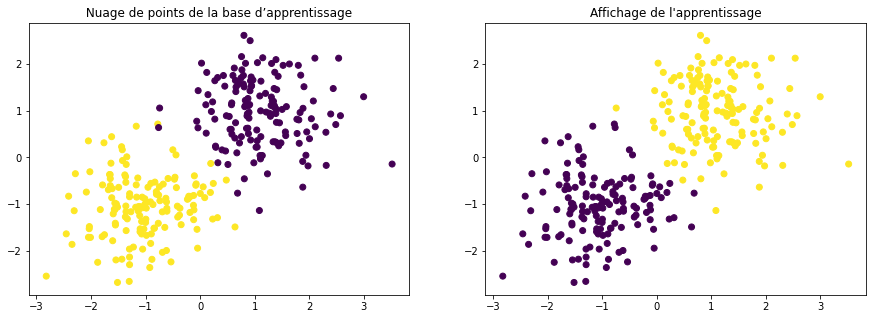

In [14]:
plt.subplots(figsize=(15,5))
#
plt.subplot(1,2,1)
plt.title(" Nuage de points de la base d’apprentissage ")
plt.scatter(X[:,0],X[:,1],c=y)
#
plt.subplot(1,2,2)
plt.title("Affichage de l'apprentissage")
plt.scatter(X[:,0],X[:,1],c=rep_Class)
plt.show()

### Commentaire:
    
    Le modèle a appris avec succès. Les deux classes sont bien distinctes.

###  PS : CLASSIFICATION AVEC LES PROBABILITES

Ici, nous proposons une classification qui se base simplement sur les valeurs de probabilités que nous renvoie la fonction sigmoide sans se fixer un seuil quelconque comme 0.5  pris précédemment.

In [20]:
def classification_Reg_LogP(samples,w):
    W=w[:-1]
    b=w[-1]
    yy = (samples@W)+b
    y=sigmoide(yy)
    return y
rep=classification_Reg_LogP(X,logreg_grad_desc(Xa,y))
rep.shape
w=logreg_grad_desc(Xa,y)
w

array([4.12472234, 3.75746553, 0.07370116])

#### Affichage

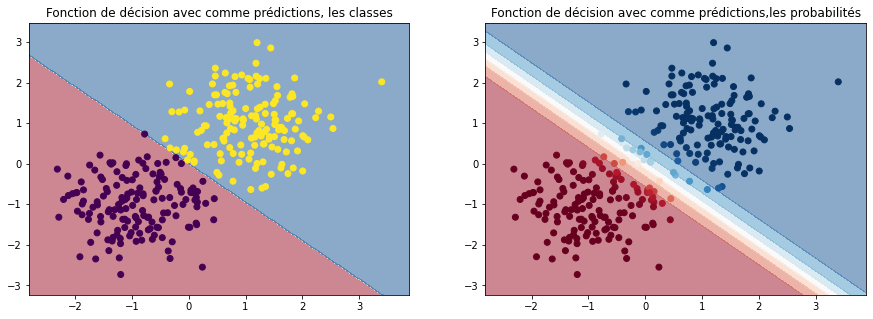

In [15]:
data_Test=mesh(X, h = 0.02)
X_test=data_Test[0]

# Affichage de l'apprentissage
plt.subplots(figsize=(15,5))
#
plt.subplot(1,2,1)
rep_Class=classification_Reg_Log(X,logreg_grad_desc(Xa,y))
w=logreg_grad_desc(Xa,y)
yhat = np.array(classification_Reg_Log(X_test,w))
zz = yhat.reshape(data_Test[1].shape)
plt.contourf(data_Test[1], data_Test[2], zz, cmap='RdBu',alpha=0.5)
plt.scatter(X[:,0],X[:,1],c=rep_Class)
plt.title("Fonction de décision avec comme prédictions, les classes")
#
plt.subplot(1,2,2)
w=logreg_grad_desc(Xa,y)
yhat = np.array(classification_Reg_LogP(X_test,w))
zz = yhat.reshape(data_Test[1].shape)
plt.contourf(data_Test[1], data_Test[2], zz, cmap='RdBu',alpha=0.5)
plt.scatter(X[:,0],X[:,1],c=rep_Class,cmap='RdBu')
plt.title("Fonction de décision avec comme prédictions,les probabilités")
plt.show()

## Commentaire:
    
 La figure de droite est celle qui fait la classification avec les probabilités. C'est pourquoi il existe une zone d'indécision. 
 
A ce niveau, les valeurs de probabilité avoisine la valeur 0.5. Le modèle ne sait pas se décider à quelle classe doit appartenir ces points. Contrairement à la première image où les données sont bien séparées grâce au seuil 0.5 que nous nous sommes fixés pour avoir 2 classes bien distinctement séparées.

### TEST DE L'EVOLUTION DE LA FONCTION COUT 

[51.65831482958163, 39.200631999121356, 35.14365705659242, 32.8326401342938, 31.27167996512867, 30.120624126953658, 29.22493931905035, 28.502203486704616, 27.90357942997207, 27.397881465214823, 26.964048006653456, 26.587222871202584, 26.25655749053044, 25.963903123708405, 25.70299418859031, 25.468917407523918, 25.25775485558006, 25.06633689511966, 24.892066840381517, 24.732793786607772, 24.586718591019462, 24.45232317681041, 24.328316567364254, 24.213593131885432, 24.10719988442895, 24.008310590344877, 23.916205057256775, 23.830252420850115, 23.74989754174203, 23.67464984899516, 23.60407412514894, 23.53778284478551, 23.475429765791546, 23.416704537991677, 23.36132814355551, 23.30904902168595, 23.259639759541983, 23.212894254270964, 23.16862526903833, 23.12666232014942, 23.086849843680625, 23.049045599094256, 23.01311927460233, 22.97895126495007, 22.94643159709824, 22.91545898321351, 22.885939983612957, 22.857788264971646, 22.8309239413187, 22.805272987193575, 22.780766713861908, 22.757

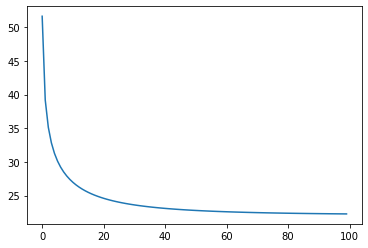

In [16]:
def logreg_grad_desc_TEST(samples,X, y):
    cout=[]
    wlist=[]
    d=X.shape[1]
    w = np.random.randn(d)
    nb_iter = 100 # to tune
    pas = 0.01 # to tune
    beta = 0.9 # for backtracking if needed - to tune
    for i in range(nb_iter):
        z = X @ w
        cout.append(logreg_cost(samples, y, w[:-1]))
        wlist.append(w)
        grad = X.T @ (y - (np.exp(-z)/(1+np.exp(-z))))
        w = w - pas * grad
    return cout
#
c=logreg_grad_desc_TEST(X,Xa, y)
plt.plot(c)
print(c)

### Commentaire:
    
    Nous pouvons observer la décroissance de la fonction coût sur le graphique précédent.
    
    La méthode de descente de gradient fonctionne bien sur ces données.

# Protocole pour tester la performance du modèle.

### 0. Fonctions pour calculer le score du modèle.

### N.B.:
Nous n'avons pas implémenté une nouvelle fonction pour calculer le score. Nous allons utiliser la fonction _" f1_score"_ de Sklearn qui calcule le score d'une bonne classification binaire.

In [17]:
from sklearn.metrics import f1_score

### 1. Diviser le jeu de données en deux : ensemble d'appretissage et celui de test.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

### 2. Avec les données d'apprentissage, les diviser en K parties afin d'alterner K fois les données d'apprentissage et de test. 

#### Nous avons choisi de diviser les données d'apprentissage en 5 parties.

In [19]:
# DECOUPAGE DE DONNEES : Cross Validation : K_Fold

def K_Fold_Implement(X,y):
    data=np.c_[X,y]
    n=X_train.shape[0]//5
    N=X_train.shape[0]
    Fold_i=[]
    for i in range(0,N,n):
        Fold_i.append(i)
    split1=data[0:Fold_i[1],:]
    split2=data[Fold_i[1]:Fold_i[2],:]
    split3=data[Fold_i[2]:Fold_i[3],:]
    split4=data[Fold_i[3]:Fold_i[4],:]
    split5=data[Fold_i[4]:N,:]

    return split1,split2,split3,split4,split5 

#
split1,split2,split3,split4,split5 = K_Fold_Implement(X_train,y_train)   

### 3. De ces k tests, tester avec différentes valeurs de pas.

Pour cela, nous testerons la fonction de descente de gradient en changeant le paramètre pas.


In [20]:
def logreg_grad_desc_A(X,y,pas):
    d=X.shape[1]
    w = np.random.randn(d)
    nb_iter = 100 # to tune
    for i in range(nb_iter):
        z = X @ w
    # insérer votre code ici
        grad = X.T @ (y - (np.exp(-z)/(1+np.exp(-z))))
        w = w - pas * grad
    return w 
#

In [21]:

Train=np.concatenate((split1,split2,split3,split4))
Test=split5

Xtrain = Train[:,0:2]
Ytrain = Train[:,2]
Xtest = Test[:,0:2]
Ytest = Test[:,2]

#
w1=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.0000001)
w2=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.01)
w3=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.001)
w4=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.005)
w5=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.00005)
#
listOfW=[w1,w2,w3,w4,w5]
t=[]
tr=[]
#
for i in range(len(listOfW)):
    rep_Class1 = classification_Reg_Log(Xtest,listOfW[i])
    tr.append(f1_score(Ytest, rep_Class1))   
#
print(tr)

[0.9583333333333334, 0.0, 0.09302325581395349, 0.0, 0.22222222222222224]


In [22]:
Train=np.concatenate((split1,split2,split3,split5))
Test=split4

Xtrain = Train[:,0:2]
Ytrain = Train[:,2]
Xtest = Test[:,0:2]
Ytest = Test[:,2]

#
w1=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.0000001)
w2=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.01)
w3=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.001)
w4=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.005)
w5=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.00005)
#
listOfW=[w1,w2,w3,w4,w5]
t=[]
tr=[]
#
for i in range(len(listOfW)):
    rep_Class1 = classification_Reg_Log(Xtest,listOfW[i])
    tr.append(f1_score(Ytest, rep_Class1))
    
#
print(tr)

[0.9302325581395349, 0.043478260869565216, 0.04444444444444444, 0.04444444444444444, 0.2105263157894737]


In [23]:
Train=np.concatenate((split1,split2,split4,split5))
Test=split3

Xtrain = Train[:,0:2]
Ytrain = Train[:,2]
Xtest = Test[:,0:2]
Ytest = Test[:,2]

#
w1=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.0000001)
w2=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.01)
w3=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.001)
w4=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.005)
w5=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.00005)
#
listOfW=[w1,w2,w3,w4,w5]
t=[]
tr=[]
#
for i in range(len(listOfW)):
    rep_Class1 = classification_Reg_Log(Xtest,listOfW[i])
    tr.append(f1_score(Ytest, rep_Class1))
    
#
print(tr)

[0.12765957446808512, 0.0, 0.0, 0.0, 0.7500000000000001]


In [24]:
Train=np.concatenate((split1,split3,split4,split5))
Test=split2

Xtrain = Train[:,0:2]
Ytrain = Train[:,2]
Xtest = Test[:,0:2]
Ytest = Test[:,2]
#
w1=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.0000001)
w2=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.01)
w3=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.001)
w4=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.005)
w5=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.00005)
#
listOfW=[w1,w2,w3,w4,w5]
t=[]
tr=[]
#
for i in range(len(listOfW)):
    rep_Class1 = classification_Reg_Log(Xtest,listOfW[i])
    tr.append(f1_score(Ytest, rep_Class1))
    
#
print(tr)

[0.8571428571428572, 0.0, 0.0, 0.0, 0.8571428571428572]


In [37]:
Train=np.concatenate((split2,split3,split4,split5))
Test=split1

Xtrain = Train[:,0:2]
Ytrain = Train[:,2]
Xtest = Test[:,0:2]
Ytest = Test[:,2]

#
w1=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.0000001)
w2=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.01)
w3=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.001)
w4=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.005)
w5=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.00005)
#
listOfW=[w1,w2,w3,w4,w5]
t=[]
tr=[]
#
for i in range(len(listOfW)):
    rep_Class1 = classification_Reg_Log(Xtest,listOfW[i])
    tr.append(f1_score(Ytest, rep_Class1))
    
#
print(tr)

[0.5599999999999999, 0.043478260869565216, 0.043478260869565216, 0.043478260869565216, 0.17777777777777778]


### 4. Choisir le pas qui nous donne le meilleur taux de bonne classification.

 Pour tous les splits, la valeur du pas qui nous donne une meilleure classification est 0.001. Cette valeur nous a donné un meilleur taux de bonne classification toutes les cinq fois.

### 5. Utiliser les données de test avec le meilleur paramètre,calculer le score de la classification.

In [57]:
w=logreg_grad_desc_A(matrice_augmente(X_test), y_test,0.0000001)

rep_Class1 = classification_Reg_Log(X_test,w)

print("Le score du modèle est {}".format(f1_score(y_test, rep_Class1)))

Le score du modèle est 0.9866666666666666


In [33]:
print("Valeur minimale de la fonction cout ",logreg_cost(X_test, y_test, w[:-1]))

Valeur minimale de la fonction cout  9.109266571743035


# 3 Diagnostique médical

On cherche à prédire la survenue d’un cancer à partir de paramètres médicaux. Pour cela, vous allez
utiliser la base de données breast_cancer de Scikit-learn.

0. Préparation de données

In [58]:
data_cancer=datasets.load_breast_cancer()
#data_cancer.target

#### Ecrivons une fonction pour centrer et réduire nos données.

In [59]:
def normalisation(data):
    moy=data.mean()
    var=data.std()
    return (data-moy)/var
#
X_normal = normalisation(data_cancer.data)
Y = data_cancer.target

1. Proposez une méthodologie valide pour comparer votre algorithme de régression logistique à
l’implémentation de scikit-learn. Les résultats seront présentés avec des taux de bonne classification moyen et des écart-types.

### Commentaires:

Afin de comparer notre implémentation à celle de Sklearn, nous choissisons comme pour la question précédente de faire une _validation croisée_.


Il est à signaler que dans un premier temps, nous n'aurons pas à estimer les meilleures hyper-paramètres de nos modèles ni nos données de test. Nous n'utiliserons que les splits de données d'apprentissage. Nous choississons de tester notre fonction avec les mêmes valeurs des hyper-paramètres que celles que la fonction de sklearn utilise par défaut.

Ces hyper-paramètres sont : Le nombre d'itérations = 100. 

Dans la deuxième partie, nous utiliserons les données de test en apprenant à l'aide des fonctions de sklearn afin de calculer le score avec les meilleurs hyper-paramètres trouvés.

### a) Cross Validation (K-Fold) avec la fonction logreg_grad_desc implémentée ci-haut.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_normal, Y, test_size=0.25,random_state=0)

In [61]:
split1,split2,split3,split4,split5 = K_Fold_Implement(X_train,y_train)  

In [114]:
Train=np.concatenate((split1,split2,split3,split4))
Test=split5

Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
w=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.0001)

rep_Class1 = classification_Reg_Log(Xtest,w)
tr1 = f1_score(Ytest, rep_Class1)  
#
print(tr1)

0.7536231884057971


In [115]:
Train=np.concatenate((split1,split2,split3,split5))
Test=split4

Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
w=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.0001)

rep_Class1 = classification_Reg_Log(Xtest,w)
tr2 = f1_score(Ytest, rep_Class1)  
#
print(tr2)

0.7681159420289855


In [125]:
Train=np.concatenate((split1,split2,split4,split5))
Test=split3

Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
w=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.0001)

rep_Class1 = classification_Reg_Log(Xtest,w)
tr3 = f1_score(Ytest, rep_Class1)  
#
print(tr3)

0.7555555555555554


In [126]:
Train=np.concatenate((split1,split3,split4,split5))
Test=split2

Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
w=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.0001)

rep_Class1 = classification_Reg_Log(Xtest,w)
tr4 = f1_score(Ytest, rep_Class1)  
#
print(tr4)

0.7943262411347518


In [139]:
Train=np.concatenate((split2,split3,split4,split5))
Test=split1

Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
w=logreg_grad_desc_A(matrice_augmente(Xtrain), Ytrain,0.0001)

rep_Class1 = classification_Reg_Log(Xtest,w)
tr5 = f1_score(Ytest, rep_Class1)  
#
print(tr5)

0.7857142857142858


In [140]:
liste_taux = [tr1,tr2,tr3,tr4,tr5]
print(" Taux de bonne classification pour cross validation : \n",liste_taux)
print()
print(" Taux moyen de bonne classification: {} ; écart-type: {} ".format(np.mean(liste_taux),np.std(liste_taux)))

 Taux de bonne classification pour cross validation : 
 [0.7536231884057971, 0.7681159420289855, 0.7555555555555554, 0.7943262411347518, 0.7857142857142858]

 Taux moyen de bonne classification: 0.7714670425678751 ; écart-type: 0.016176126368913645 


###  b) Cross Validation  avec la fonction de Sklearn

In [141]:
Train=np.concatenate((split1,split2,split3,split4))
Test=split5
#
Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
clf = LogisticRegression(random_state=0).fit(Xtrain,Ytrain)
prediction=clf.predict(Xtest)
taux1 = f1_score(Ytest,prediction)
print(taux1)
####
Train=np.concatenate((split1,split2,split3,split5))
Test=split4
#
Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
clf = LogisticRegression(random_state=0).fit(Xtrain,Ytrain)
prediction=clf.predict(Xtest)
taux2 = f1_score(Ytest,prediction)
print(taux2)
####
Train=np.concatenate((split1,split2,split4,split5))
Test=split3
#
Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
clf = LogisticRegression(random_state=0).fit(Xtrain,Ytrain)
prediction=clf.predict(Xtest)
taux3 = f1_score(Ytest,prediction)
#
print(taux3)
####
Train=np.concatenate((split1,split3,split4,split5))
Test=split2
#
Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
clf = LogisticRegression(random_state=0).fit(Xtrain,Ytrain)
prediction=clf.predict(Xtest)
taux4 = f1_score(Ytest,prediction)
print(taux4)
####
Train=np.concatenate((split2,split3,split4,split5))
Test=split1
#
Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
clf = LogisticRegression(random_state=0).fit(Xtrain,Ytrain)
prediction=clf.predict(Xtest)
taux5 = f1_score(Ytest,prediction)
print(taux5)

0.9357798165137614
0.9259259259259259
0.9174311926605505
0.912280701754386
0.9642857142857142


In [142]:
liste_tauxT = [taux1,taux2,taux2,taux3,taux4,taux5]
print(" Taux de bonne classification pour cross validation : \n",liste_tauxT)
print()
print(" Taux moyen de bonne classification: {} ; écart-type: {} ".format(np.mean(liste_tauxT),np.std(liste_tauxT)))

 Taux de bonne classification pour cross validation : 
 [0.9357798165137614, 0.9259259259259259, 0.9259259259259259, 0.9174311926605505, 0.912280701754386, 0.9642857142857142]

 Taux moyen de bonne classification: 0.9302715461777108 ; écart-type: 0.016899796184322767 


 2. Comparez maintenant avec un algorithme la regression logistique régularisée en utilisant l’implémentation de Scikit-learn.

In [143]:
from sklearn.linear_model import RidgeClassifier

In [144]:

Train=np.concatenate((split1,split2,split3,split4))
Test=split5
#
Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
clf = RidgeClassifier(random_state=0).fit(Xtrain,Ytrain)
prediction=clf.predict(Xtest)
taux1 = f1_score(Ytest,prediction)
print(taux1)
####
Train=np.concatenate((split1,split2,split3,split5))
Test=split4
#
Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
clf = RidgeClassifier(random_state=0).fit(Xtrain,Ytrain)
prediction=clf.predict(Xtest)
taux2 = f1_score(Ytest,prediction)
print(taux2)
####
Train=np.concatenate((split1,split2,split4,split5))
Test=split3
#
Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
clf = RidgeClassifier(random_state=0).fit(Xtrain,Ytrain)
prediction=clf.predict(Xtest)
taux3 = f1_score(Ytest,prediction)
#
print(taux3)
####
Train=np.concatenate((split1,split3,split4,split5))
Test=split2
#
Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
clf = RidgeClassifier(random_state=0).fit(Xtrain,Ytrain)
prediction=clf.predict(Xtest)
taux4 = f1_score(Ytest,prediction)
print(taux4)
####
Train=np.concatenate((split2,split3,split4,split5))
Test=split1
#
Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
clf = RidgeClassifier(random_state=0).fit(Xtrain,Ytrain)
prediction=clf.predict(Xtest)
taux5 = f1_score(Ytest,prediction)
print(taux5)


0.9203539823008848
0.9137931034482758
0.9189189189189189
0.9016393442622951
0.9322033898305084


In [145]:
liste_tauxR = [taux1,taux2,taux2,taux3,taux4,taux5]
print(" Taux de bonne classification pour cross validation : \n",liste_tauxR)
print()
print(" Taux moyen de bonne classification: {} ; écart-type: {} ".format(np.mean(liste_tauxR),np.std(liste_tauxR)))

 Taux de bonne classification pour cross validation : 
 [0.9203539823008848, 0.9137931034482758, 0.9137931034482758, 0.9189189189189189, 0.9016393442622951, 0.9322033898305084]

 Taux moyen de bonne classification: 0.9167836403681932 ; écart-type: 0.009149788305092046 


#### Comparaison de nos trois modèles.

In [146]:
import pandas as pd

dfram = pd.DataFrame({'Méthode':['classification_Reg_Log','LogisticRegression','RidgeClassifier'] , 'Score moyen':[np.mean(liste_taux),np.mean(liste_tauxT),np.mean(liste_tauxR)]," Ecart-type":[np.std(liste_taux),np.std(liste_tauxT),np.std(liste_tauxR)] })
dfram

,Méthode,Score moyen,Ecart-type
0,classification_Reg_Log,0.771467,0.016176
1,LogisticRegression,0.930272,0.016900
2,RidgeClassifier,0.916784,0.009150


### Commentaires:
    
    L'écart-type de ces valeurs nous montre comment les scores varient en moyenne. 
  
-  Notre méthode implémentée  _'classification_Reg_Log'_  et celle de sklearn _'LogisticRegression'_ nous donne à peu près les mêmes résultats.

- La régression logistique régularisée nous donne un faible score par rapport aux deux méthodes précédentes. Cependant, son écart-type est très faible. Ce qui prouve combien le modèle ne varie pas beaucoup peu importe la partie du jeu de données prise en compte. Donc, il serait dans ce cas le modèle le plus fiable.

3. Poursuivez les expérimentations en ’jouant’ avec les autres paramètres de l’algorithme de Scikit learn.

4. Analysez et commentez les résultats de chaque test.

### Ci-dessous, les réponses à ces deux questions.

#### Test des paramètres avec _' RidgeClassifier_ '.

1. Hyper-paramètre : _tol_

In [147]:
Train=np.concatenate((split1,split2,split3,split4))
Test=split5
#
Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
t= []
tab = [0.01,0.001,0.0001,0.00001,0.0000000000001]
for i in range(len(tab)):
    clf = LogisticRegression(tol=tab[i],random_state=0).fit(Xtrain,Ytrain)
    prediction=clf.predict(Xtest)
    t.append(f1_score(Ytest,prediction))
print(t)

[0.9357798165137614, 0.9357798165137614, 0.9357798165137614, 0.9357798165137614, 0.9357798165137614]


2. Hyper-paramètre : _C_

In [148]:
Train=np.concatenate((split1,split2,split3,split4))
Test=split5
#
Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
t= []
tab = [1,0.1,0.01,0.001,0.0001,0.00001,0.0000000000001]
for i in range(len(tab)):
    clf = LogisticRegression(C=tab[i],random_state=0).fit(Xtrain,Ytrain)
    prediction=clf.predict(Xtest)
    t.append(f1_score(Ytest,prediction))
print(t)

[0.9357798165137614, 0.9357798165137614, 0.9203539823008848, 0.8455284552845529, 0.7536231884057971, 0.7536231884057971, 0.0]


#### N.B.:  Le score diminue avec l'augmentation de la valeur de _C_. A une certaine valeur de C, le score de change plus.

3. Hyper-paramètre : _max_iter_.

In [149]:
Train=np.concatenate((split1,split2,split3,split4))
Test=split5
#
Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
t= []
tab = [50,100,1000,1000000000]
for i in range(len(tab)):
    clf = LogisticRegression(max_iter=tab[i],random_state=0).fit(Xtrain,Ytrain)
    prediction=clf.predict(Xtest)
    t.append(f1_score(Ytest,prediction))
print(t)

[0.9357798165137614, 0.9357798165137614, 0.9357798165137614, 0.9357798165137614]


### Commentaires:

Pour le modèle de Sklearn  _"LogisticRegression"_, le paramètre le plus important est _"C"_.


- Inverse de la force de régularisation. Comme dans les machines à vecteurs de support, des valeurs plus petites spécifient une régularisation plus forte.( Cfr Documentation Sklearn ).


- Les autres hyper-paramètres gardent le même score du modèle.

In [150]:
clf = LogisticRegression(random_state=0).fit(X_train,y_train)
prediction=clf.predict(X_test)
t = f1_score(y_test,prediction)
print("Score avec les données de test pour la meilleure valeur de C : ",t)

Score avec les données de test pour la meilleure valeur de C :  0.9502762430939227


#### Test des paramètres avec _' RidgeClassifier '_.

1. Hyper-paramètre : _alpha_

In [151]:
Train=np.concatenate((split1,split2,split3,split4))
Test=split5
#
Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
t=[]
tab=[0.1,1,10,100,10000,20000,100000,2000000,2000000000]
for i in range(len(tab)):
    clf = RidgeClassifier(alpha=tab[i],random_state=0).fit(Xtrain,Ytrain)
    prediction=clf.predict(Xtest)
    t.append(f1_score(Ytest,prediction))
print(t)

[0.9454545454545454, 0.9203539823008848, 0.9122807017543859, 0.9122807017543859, 0.8, 0.7819548872180451, 0.7536231884057971, 0.7536231884057971, 0.7536231884057971]


#### N.B.:  Le score diminue avec l'augmentation de la valeur de _alpha_. A une certaine valeur de alpha, le score de change plus.

2. Hyper-paramètre : _fit_intercept_

In [152]:
Train=np.concatenate((split1,split2,split3,split4))
Test=split5
#
Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
t=[]
tab=[True, False]
for i in range(len(tab)):
    clf = RidgeClassifier(fit_intercept=tab[i],random_state=0).fit(Xtrain,Ytrain)
    prediction=clf.predict(Xtest)
    t.append(f1_score(Ytest,prediction))
print(t)

[0.9203539823008848, 0.9203539823008848]


3. Hyper-paramètre : _max_iter_

In [153]:
Train=np.concatenate((split1,split2,split3,split4))
Test=split5
#
Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
t=[]
tab=[50,100,1000,1000000000]
for i in range(len(tab)):
    clf = RidgeClassifier(max_iter=tab[i],random_state=0).fit(Xtrain,Ytrain)
    prediction=clf.predict(Xtest)
    t.append(f1_score(Ytest,prediction))
print(t)

[0.9203539823008848, 0.9203539823008848, 0.9203539823008848, 0.9203539823008848]


4. Hyper-paramètre : _tol_

In [154]:
Train=np.concatenate((split1,split2,split3,split4))
Test=split5
#
Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
t=[]
tab=[0.01,0.001,0.00001,0.0000000000001]
for i in range(len(tab)):
    clf = RidgeClassifier(tol=tab[i],random_state=0).fit(Xtrain,Ytrain)
    prediction=clf.predict(Xtest)
    t.append(f1_score(Ytest,prediction))
print(t)

[0.9203539823008848, 0.9203539823008848, 0.9203539823008848, 0.9203539823008848]


5. Hyper-paramètre : _solver_

In [155]:
Train=np.concatenate((split1,split2,split3,split4))
Test=split5
#
Xtrain = Train[:,0:30]
Ytrain = Train[:,30]
Xtest = Test[:,0:30]
Ytest = Test[:,30]
#
t=[]
tab = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
for i in range(len(tab)):
    clf = RidgeClassifier(solver=tab[i],random_state=0).fit(Xtrain,Ytrain)
    prediction=clf.predict(Xtest)
    t.append(f1_score(Ytest,prediction))
print(t)

[0.9203539823008848, 0.9203539823008848, 0.9203539823008848, 0.9203539823008848, 0.9203539823008848, 0.9203539823008848, 0.9203539823008848]


### Commentaires:

Pour le modèle de Sklearn  _"RidgeClassifier"_, le paramètre le plus important est _"alpha"_.


- Etant un modèle de régression logistique régularisée, son paramètre _alpha_ représente la force de régularisation. La régularisation améliore le conditionnement du problème et réduit la variance des estimations. Des valeurs plus élevées indiquent une régularisation plus forte et améliore le résultat. 


- Les autres hyper-paramètres gardent le même score du modèle.

In [156]:
clf = RidgeClassifier(alpha=0.1,random_state=0).fit(X_train,y_train)
prediction=clf.predict(X_test)
t = f1_score(y_test,prediction)
print("Score avec les données de test pour la meilleure valeur de alpha : ",t)

Score avec les données de test pour la meilleure valeur de alpha :  0.9723756906077348


In [157]:
clf = RidgeClassifier(random_state=0).fit(X_train,y_train)
prediction=clf.predict(X_test)
t = f1_score(y_test,prediction)
print("Score avec les données de test pour alpha par défaut soit égal à 1: ",t)

Score avec les données de test pour alpha par défaut soit égal à 1:  0.9375
